# Shapefiles

List of shapefiles sometimes unavailable due to connectivity issues.

In [53]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Common parts

In [50]:
%matplotlib inline

In [51]:
import os
import geopandas

In [52]:
def geo_read_csv_cache(cache, url, **kwargs):
    """
    Checks that the data is not cached before loading it
    again.

    :param cache: filename
    :param url: data url
    :param kwargs: see :epkg:`pandas:read_csv`
    :return:  see :epkg:`pandas:read_csv`
    """
    ext = "%s.geojson" % cache
    if os.path.exists(ext):
        with open(ext, 'r', encoding='utf-8'):
            return geopandas.read_file(ext, **kwargs)
    df = geopandas.read_file(url, **kwargs)
    with open(ext, 'w', encoding='utf-8') as f:
        f.write(df.to_json(), **kwargs)
    return df

## departements-20180101-shp.zip

In [26]:
shp = geo_read_csv_cache("departements-20180101-shp", "departements-20180101.shp")

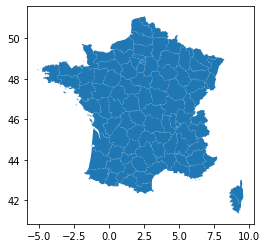

In [37]:
metropole = shp[shp['code_insee'].apply(lambda x: len(str(x)) <= 2 or x in ('69D', '69M'))]
metropole.plot();

In [31]:
shp[shp['code_insee'].apply(lambda x: len(str(x)) > 2)]

,code_insee,nom,nuts3,wikipedia,surf_km2,geometry
0,974,La Réunion,FR940,fr:La Réunion,2505.0,"MULTIPOLYGON (((55.21643 -21.03904, 55.21652 -..."
21,972,Martinique,FR920,fr:Martinique,1089.0,"MULTIPOLYGON (((-61.22908 14.82247, -61.22895 ..."
63,69D,Rhône,None,fr:Rhône (département),2720.0,"MULTIPOLYGON (((4.24364 45.99721, 4.24367 45.9..."
64,69M,Métropole de Lyon,FR716,fr:Métropole de Lyon,538.0,"POLYGON ((4.69174 45.78845, 4.69193 45.78851, ..."
65,971,Guadeloupe,FR910,fr:Guadeloupe,1634.0,"MULTIPOLYGON (((-61.80976 16.27270, -61.80976 ..."
79,973,Guyane,FR930,fr:Guyane,83543.0,"MULTIPOLYGON (((-54.60278 2.33370, -54.60268 2..."
93,976,Mayotte,None,fr:Mayotte,366.0,"MULTIPOLYGON (((45.03981 -12.72228, 45.03981 -..."


## DEPARTEMENTS.zip

In [43]:
shp = geo_read_csv_cache("DEPARTEMENT-shp", "DEPARTEMENT.shp")

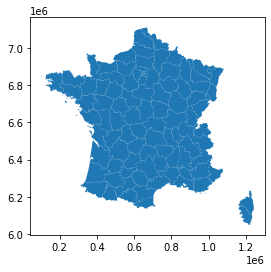

In [44]:
shp.plot();

In [45]:
shp.head()

,ID_GEOFLA,CODE_DEPT,NOM_DEPT,CODE_CHF,NOM_CHF,X_CHF_LIEU,Y_CHF_LIEU,X_CENTROID,Y_CENTROID,CODE_REG,NOM_REG,geometry
0,DEPARTEM0000000000000004,89,YONNE,024,AUXERRE,742447,6744261,748211,6750855,27,BOURGOGNE-FRANCHE-COMTE,"POLYGON ((701742.000 6751181.100, 701651.900 6..."
1,DEPARTEM0000000000000028,69,RHONE,381,LYON,842221,6520526,832095,6530600,84,AUVERGNE-RHONE-ALPES,"POLYGON ((805106.900 6560756.000, 805127.000 6..."
2,DEPARTEM0000000000000063,51,MARNE,108,CHALONS-EN-CHAMPAGNE,799920,6873828,795875,6873865,44,ALSACE-CHAMPAGNE-ARDENNE-LORRAINE,"POLYGON ((751361.000 6900333.400, 751066.700 6..."
3,DEPARTEM0000000000000006,28,EURE-ET-LOIR,085,CHARTRES,588211,6817344,579506,6810114,24,CENTRE-VAL DE LOIRE,"POLYGON ((548948.900 6823333.300, 548949.000 6..."
4,DEPARTEM0000000000000010,67,BAS-RHIN,482,STRASBOURG,1050377,6840891,1035762,6839265,44,ALSACE-CHAMPAGNE-ARDENNE-LORRAINE,"POLYGON ((995986.400 6885362.900, 996001.600 6..."


## LIMITE_DEPARTEMENT.zip

In [47]:
shp = geo_read_csv_cache("LIMITE_DEPARTEMENT-shp", "LIMITE_DEPARTEMENT.shp")

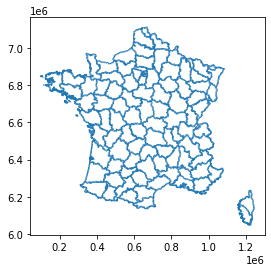

In [48]:
shp.plot();

In [49]:
shp.head()

,ID_GEOFLA,NATURE,geometry
0,LIMI_DEP0000000000001972,Limite de département,"LINESTRING (630485.900 6843374.600, 630485.500..."
1,LIMI_DEP0000000000004934,Limite côtière,"LINESTRING (156873.200 6814488.800, 156838.100..."
2,LIMI_DEP0000000000007227,Limite de région,"LINESTRING (630002.700 6590446.600, 630000.900..."
3,LIMI_DEP0000000000006760,Frontière internationale,"LINESTRING (929408.700 6566136.200, 929398.500..."
4,LIMI_DEP0000000000008731,Limite de département,"LINESTRING (633457.200 6642556.100, 633472.400..."


## georef-france-departement.zip

In [55]:
shp = geo_read_csv_cache("georef-france-departement-shp", "georef-france-departement-millesime.shp")

In [65]:
shp['dep_type'] = shp['dep_type'].apply(lambda x: x.replace("Ã©", "é"))

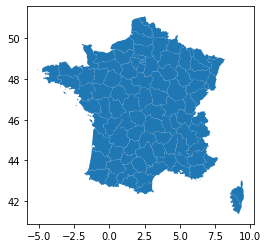

In [66]:
metropole = shp[shp['dep_code'].apply(lambda x: len(str(x)) <= 2)]
metropole.plot();

In [67]:
shp.head()

,year,reg_code,reg_name,dep_code,dep_current,dep_name,dep_name_up,dep_name_lo,dep_area_co,dep_type,dep_status,dep_siren_c,dep_is_ctu,geometry
0,2020,76,Occitanie,12,12,Aveyron,AVEYRON,aveyron,FXX,département,rural,221200017,Non,"POLYGON ((2.20779 44.61577, 2.21575 44.62475, ..."
1,2020,28,Normandie,14,14,Calvados,CALVADOS,calvados,FXX,département,urbain,221401185,Non,"POLYGON ((0.29688 49.42992, 0.29674 49.41231, ..."
2,2020,84,Auvergne-RhÃ´ne-Alpes,15,15,Cantal,CANTAL,cantal,FXX,département,rural,221500010,Non,"POLYGON ((2.98168 44.64467, 2.97544 44.64472, ..."
3,2020,84,Auvergne-RhÃ´ne-Alpes,43,43,Haute-Loire,HAUTE LOIRE,haute-loire,FXX,département,rural,224300012,Non,"POLYGON ((4.48314 45.23657, 4.49082 45.22354, ..."
4,2020,03,Guyane,973,973,Guyane,GUYANE,guyane,GUF,département,rural,None,Oui,"MULTIPOLYGON (((-53.87046 5.74493, -53.87660 5..."
